# Bank dataset

In [2]:
import pandas as pd
from sklearn import ensemble
df = pd.read_csv("bank-additional-full.csv", ";")
df_dummies = pd.get_dummies(df)




In [3]:
del df_dummies["duration"]
del df_dummies["y_no"]
df_dummies.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_yes
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,1,0,0,0,0,1,0,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

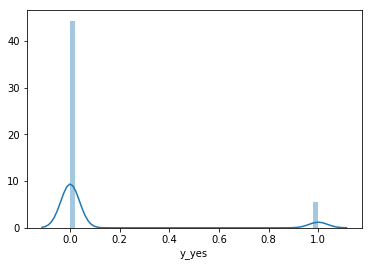

In [5]:
sns.distplot(df_dummies["y_yes"] )

In [6]:
from sklearn.model_selection import KFold, cross_val_score

clf = ensemble.ExtraTreesClassifier(100)
x = df_dummies.iloc[:,:-1]
y = df_dummies["y_yes"]
k_fold = KFold(n_splits=10)
score_tree = cross_val_score(clf, x, y, cv=10, n_jobs=-1)


In [11]:
import numpy as np
from sklearn.model_selection import train_test_split
print(np.mean(score_tree))

x, x_test, y, y_test = train_test_split(x, y, test_size = 0.2)
clf.fit(x,y)

0.5231057321989888


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Feature ranking:
1. age (0.148904)
2. euribor3m (0.107316)
3. campaign (0.097757)
4. nr.employed (0.039984)
5. poutcome_success (0.033937)
6. pdays (0.032835)
7. emp.var.rate (0.022968)
8. housing_no (0.021471)
9. housing_yes (0.021132)
10. cons.conf.idx (0.017641)
11. job_admin. (0.017405)
12. marital_married (0.017344)
13. education_high.school (0.016441)
14. education_university.degree (0.015862)
15. marital_single (0.015719)
16. day_of_week_thu (0.015596)
17. day_of_week_mon (0.015090)
18. day_of_week_wed (0.014928)
19. day_of_week_tue (0.014841)
20. day_of_week_fri (0.014400)
21. loan_no (0.014242)
22. job_technician (0.014185)
23. loan_yes (0.013878)
24. cons.price.idx (0.013717)
25. previous (0.012374)
26. education_professional.course (0.011900)
27. job_blue-collar (0.011234)
28. marital_divorced (0.011215)
29. education_basic.9y (0.010735)
30. month_may (0.009805)
31. job_management (0.009062)
32. job_services (0.009052)
33. poutcome_nonexistent (0.009007)
34. contact_cellular

(0, 0.1620888765370457)

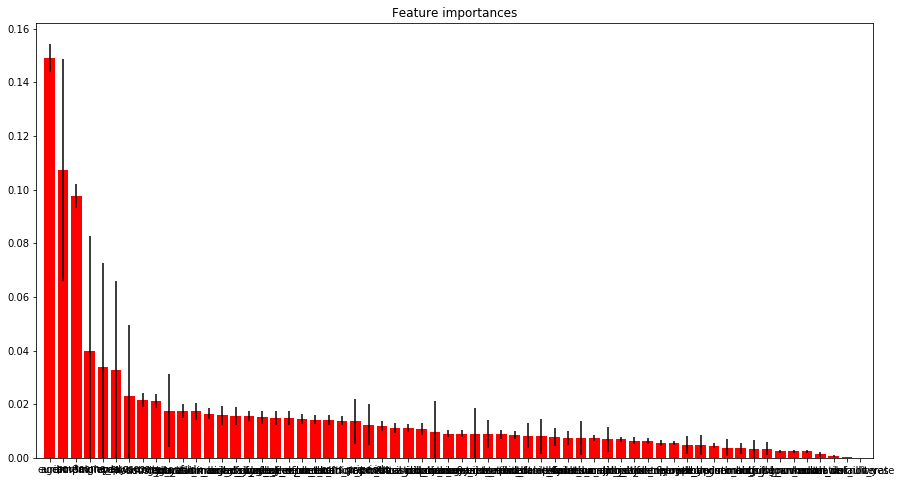

In [12]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
features = list(df_dummies.columns.values[:-1])
print("Feature ranking:")
for f in range(x.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))
# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(x.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(x.shape[1]), np.array(features)[indices])
plt.xlim([-1, x.shape[1]])
fig.set_size_inches(15, 8)
axes = plt.gca()
axes.set_ylim([0,None])

In [13]:
from sklearn.metrics import confusion_matrix

#Confusion matrix
y_pred = clf.predict(x_test)
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[6971  316]
 [ 687  264]]
